# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**


## Name: David Palumbo

## The Dataset

### Acknowledgements

Big Thanks to https://www.superdatascience.com/pages/deep-learning

Banner Photo by Sharon McCutcheon on Unsplash

### Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [3]:
## YOUR CODE HERE
missing_values = ["NA", "na", "--"]
hw_ds_path = "HW2_dataset.csv"
hw_ds = pd.read_csv(hw_ds_path, na_values=missing_values)
hw_ds = hw_ds.drop(columns=["RowNumber"])

**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

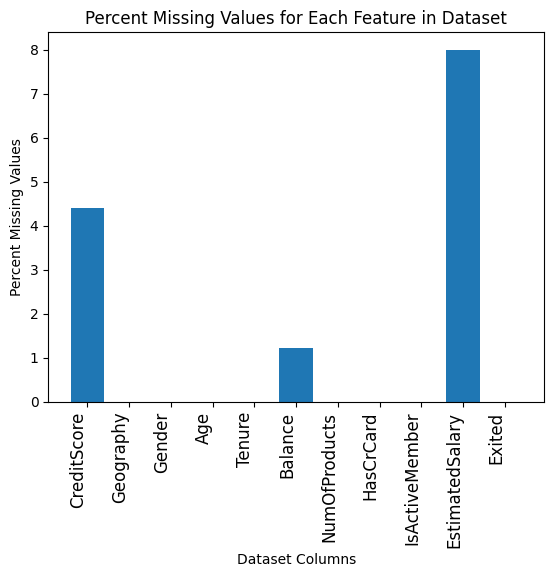

In [4]:
## YOUR CODE HERE
""" 
Dropping Surname seems like it would be benificial as it probably would not add much to the data.
Especially since there are so many unique values.

In a similar way, customerId doesn't seem like it would have useful information towards making our class predictions.
While it is a number, it is a discrete feature, with all unique values.
"""
# Drop Surname and CustomerId col
hw_ds = hw_ds.drop(columns=["Surname", "CustomerId"])

ds_cols = hw_ds.columns
num_rows = len(hw_ds.index)

pcent_missing = (hw_ds.isnull().sum()*100)/num_rows

plt.bar(ds_cols, pcent_missing)
plt.xlabel("Dataset Columns")
plt.ylabel("Percent Missing Values")
plt.title("Percent Missing Values for Each Feature in Dataset")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment="right", fontsize=12)
plt.show()

""" 
Would you concider dropping any columns?
I concider dropping Estimated Salary, since there is around 8% missing data.
But that still seems low enough that it would just be better to drop the rows with missing values

In theory, we don't need to drop missing values for tree, but I found that it was much easier to get the sklearn functions to run wihtout missing values.
So, I just dropped them to simplify the process.
"""

# Drop rows with missing values
hw_ds = hw_ds.dropna()


**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

**Clarification with Example below : Here `flWinner` is the Target Variable and `descMapName` is a categorical feature. You are required to make such side-by-side bar plot for each categorical feature with repect to it's class distribution with the target feature for our dataset.**

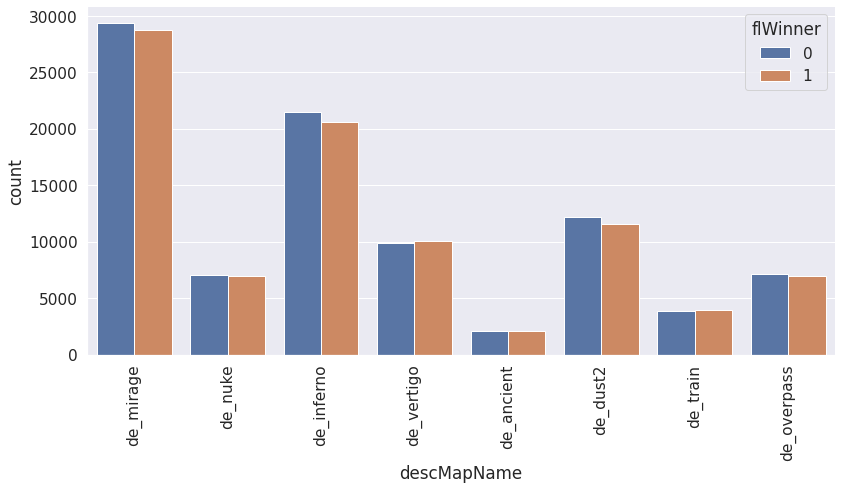

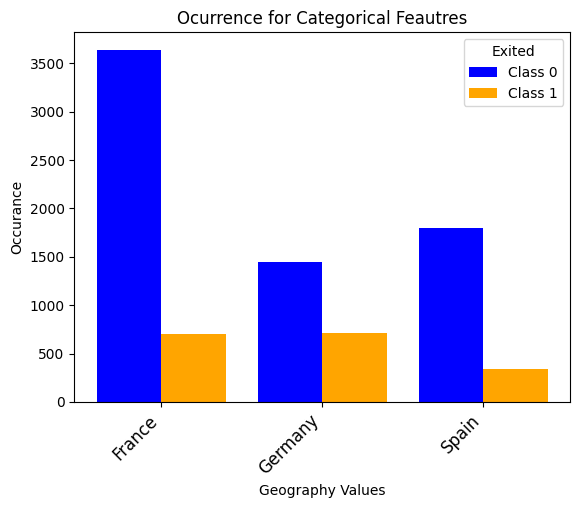

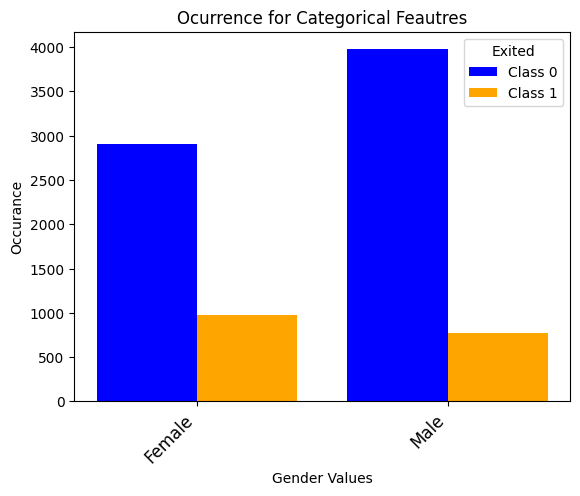

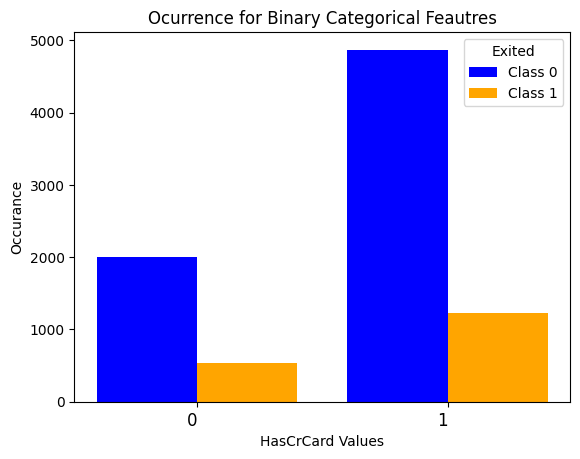

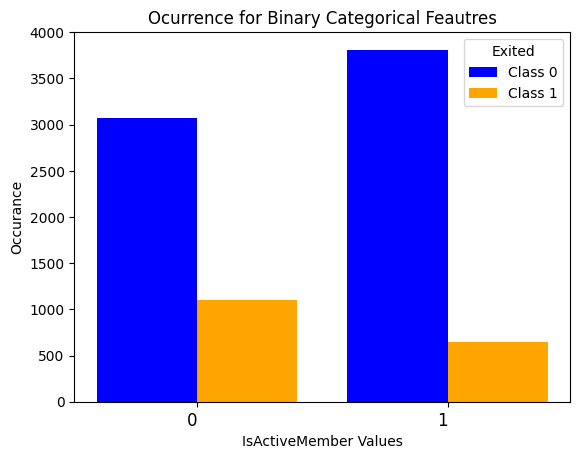

In [7]:
## YOUR CODE HERE
from category_encoders import TargetEncoder
target = "Exited"
cat_features = ["Geography", "Gender"]
cat_binary_features = ["HasCrCard", "IsActiveMember"]

for i in range(0, len(cat_features)):
    fig = plt.figure()
    ax = plt.gca()
    # Find number of occurances for one target class and for the other
    temp_feature_vals_occurances_class_0 = hw_ds[hw_ds[target]==0][cat_features[i]].value_counts()
    temp_feature_vals_occurances_class_1 = hw_ds[hw_ds[target]==1][cat_features[i]].value_counts()

    temp_keys0 = list(temp_feature_vals_occurances_class_0.keys())
    temp_keys1 = list(temp_feature_vals_occurances_class_1.keys())
    all_keys = np.unique(temp_keys0 + temp_keys1)

    # Fill in 0s for the values that are not in the occuranc sets
    for key in all_keys:
        if not key in temp_feature_vals_occurances_class_0:
            temp_feature_vals_occurances_class_0[key] = 0
        if not key in temp_feature_vals_occurances_class_1:
            temp_feature_vals_occurances_class_1[key] = 0

    X_axis = np.arange(len(all_keys))

    rects0 = ax.bar((X_axis-0.2), temp_feature_vals_occurances_class_0[all_keys], 0.4, color="blue", label="Class 0")
    rects1 = ax.bar((X_axis+0.2), temp_feature_vals_occurances_class_1[all_keys], 0.4, color="orange", label="Class 1")
    
    plt.xticks(X_axis, all_keys)
    plt.xlabel(cat_features[i] + " Values")
    plt.ylabel("Occurance")
    plt.title("Ocurrence for Categorical Feautres")
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=12)
    plt.legend(handles=[rects0, rects1], title=target)
    plt.show()

# Also do for binary categorical features
for i in range(0, len(cat_binary_features)):
    fig = plt.figure()
    ax = plt.gca()
    # Find number of occurances for one target class and for the other
    temp_feature_vals_occurances_class_0 = hw_ds[hw_ds[target]==0][cat_binary_features[i]].value_counts()
    temp_feature_vals_occurances_class_1 = hw_ds[hw_ds[target]==1][cat_binary_features[i]].value_counts()

    temp_keys0 = list(temp_feature_vals_occurances_class_0.keys())
    temp_keys1 = list(temp_feature_vals_occurances_class_1.keys())
    all_keys = np.unique(temp_keys0 + temp_keys1)

    # Fill in 0s for the values that are not in the occuranc sets
    for key in all_keys:
        if not key in temp_feature_vals_occurances_class_0:
            temp_feature_vals_occurances_class_0[key] = 0
        if not key in temp_feature_vals_occurances_class_1:
            temp_feature_vals_occurances_class_1[key] = 0

    X_axis = np.arange(len(all_keys))

    rects0 = ax.bar((X_axis-0.2), temp_feature_vals_occurances_class_0[all_keys], 0.4, color="blue", label="Class 0")
    rects1 = ax.bar((X_axis+0.2), temp_feature_vals_occurances_class_1[all_keys], 0.4, color="orange", label="Class 1")
    
    plt.xticks(X_axis, all_keys)
    plt.xlabel(cat_binary_features[i] + " Values")
    plt.ylabel("Occurance")
    plt.title("Ocurrence for Binary Categorical Feautres")
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment="right", fontsize=12)
    plt.legend(handles=[rects0, rects1], title=target)
    plt.show()


**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

c:\Users\dpalumbo\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\dpalumbo\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


OH feature names:  ['Geography_1', 'Geography_2', 'Geography_3', 'Gender_1', 'Gender_2']
(5181, 13)
(5181, 1)


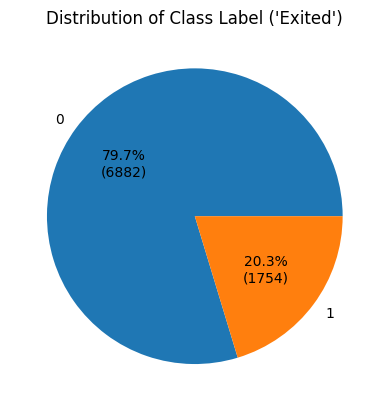

In [8]:
## YOUR CODE HERE
""" 
In theory, for categorical data, we should not need to encode in order to run decision tree.
Yet, this is causing errors in sklearn functions, so I just decided to encode them in order for the functions to work.
This makes the feature importance a little more confusing to understand, since 
"""

from category_encoders import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def pct_func(pct):
    val = int(np.around((pct * len(hw_ds))/100))
    return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)

ax = hw_ds.groupby(target).size().plot(kind="pie", autopct=pct_func)
ax.set_title("Distribution of Class Label ('Exited')")

""" 
The dataset seems quite imbalanced.  So it would be good to use a stratified split.
Will put 20% into test set and 20% into validation data.
"""

# Encode cat features then split
ohe_features = [ 
    "Geography",
    "Gender",
]
num_features = [ 
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "EstimatedSalary"
]

hw_ds_X = hw_ds.drop(columns=[target])
hw_ds_y = hw_ds[target]

# Convert y vectors to np arrays, so that they are same as X
hw_ds_y = hw_ds_y.to_numpy().reshape(-1,1)

preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (OneHotEncoder(handle_unknown="ignore"), ohe_features),
                                    remainder="passthrough"
                                    )

hw_ds_X = preprocess.fit_transform(hw_ds_X, hw_ds_y)
oh_feat_names = preprocess.named_transformers_["onehotencoder"].get_feature_names()
print("OH feature names: ", oh_feat_names)

# Split into train and test with stratified split
X_dev, X_test, y_dev, y_test = train_test_split(hw_ds_X, hw_ds_y, test_size=0.2, random_state=123, stratify=hw_ds_y)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=123, stratify=y_dev)

# We should standardize the columns in the feature matrices
# This is important since the numerical columns have vastly different ranges
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)         # Fit and transform scalar on dev set
X_val = scalar.fit_transform(X_val)         # Transform val set
X_test = scalar.fit_transform(X_test)       # Transform test set
X_dev = scalar.fit_transform(X_dev)

# Add a column of ones to the feature matrices (adds a bias term)
# NOTE: Has been removed, we don't need bias for Decicison Trees
# X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
# X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
# X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train.shape)
print(y_train.shape)

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [9]:
## YOUR CODE HERE
"""
This was handled in the above cell before doing the dev and train split.
Categorical data was encoded for two features with One hot encoding.  
And there was standardization scaling applied to the features in X, since different features are over quite different ranges.
"""

'\nThis was handled in the above cell before doing the dev and train split.\nCategorical data was encoded for two features with One hot encoding.  \nAnd there was standardization scaling applied to the features in X, since different features are over quite different ranges.\n'

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [10]:
## YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
dt = DecisionTreeClassifier(criterion="gini", random_state=123)

# Can train on entire dev set, since no hyperparameter tuning 
dt.fit(X_dev, y_dev)

# Since dataset is imbalanced, we will use metrics that are not just simple accuracy
# Not 100% sure about all the details of the problem the databased is meant for, 
# So will show all recall, precision, and f1 score, rather than picking specificlly recall or precision
yhat_train = dt.predict(X_dev)
yhat_test = dt.predict(X_test)

train_recall_score = recall_score(y_dev, yhat_train, pos_label=1)
train_precision_score = precision_score(y_dev, yhat_train, pos_label=1)
train_f1_score = f1_score(y_dev, yhat_train, pos_label=1)

test_recall_score = recall_score(y_test, yhat_test, pos_label=1)
test_precision_score = precision_score(y_test, yhat_test, pos_label=1)
test_f1_score = f1_score(y_test, yhat_test, pos_label=1)

""" 
Note: Dev metrics are 1.0 since it trained to complete purity
"""
print("--- Metrics ---")
print("Dev Set:")
print("Recall: \t", train_recall_score)
print("Precision: \t", train_precision_score)
print("F1 Score: \t", train_f1_score)
print("Test Set:")
print("Recall: \t", test_recall_score)
print("Precision: \t", test_precision_score)
print("F1 Score: \t", test_f1_score)

--- Metrics ---
Dev Set:
Recall: 	 1.0
Precision: 	 1.0
F1 Score: 	 1.0
Test Set:
Recall: 	 0.4985754985754986
Precision: 	 0.48342541436464087
F1 Score: 	 0.4908835904628331


**1.7: Visualize the trained tree until the max_depth 8**

[Text(0.5800019500780031, 0.95, 'Age <= 0.35\ngini = 0.324\nsamples = 6908\nvalue = [5505, 1403]'),
 Text(0.36134945397815915, 0.85, 'NumOfProducts <= 1.663\ngini = 0.205\nsamples = 4920\nvalue = [4351, 569]'),
 Text(0.23985959438377535, 0.75, 'NumOfProducts <= -0.057\ngini = 0.182\nsamples = 4812\nvalue = [4324, 488]'),
 Text(0.12480499219968799, 0.65, 'Geography_3 <= 0.597\ngini = 0.268\nsamples = 2366\nvalue = [1989, 377]'),
 Text(0.06279251170046801, 0.55, 'Balance <= -0.288\ngini = 0.222\nsamples = 1796\nvalue = [1567, 229]'),
 Text(0.031981279251170044, 0.45, 'Gender_2 <= -0.095\ngini = 0.362\nsamples = 421\nvalue = [321, 100]'),
 Text(0.0171606864274571, 0.35, 'Age <= -0.032\ngini = 0.435\nsamples = 194\nvalue = [132, 62]'),
 Text(0.0093603744149766, 0.25, 'Balance <= -0.327\ngini = 0.378\nsamples = 146\nvalue = [109, 37]'),
 Text(0.0062402496099844, 0.15, 'IsActiveMember <= -0.045\ngini = 0.368\nsamples = 144\nvalue = [109, 35]'),
 Text(0.0031201248049922, 0.05, '\n  (...)  \n'

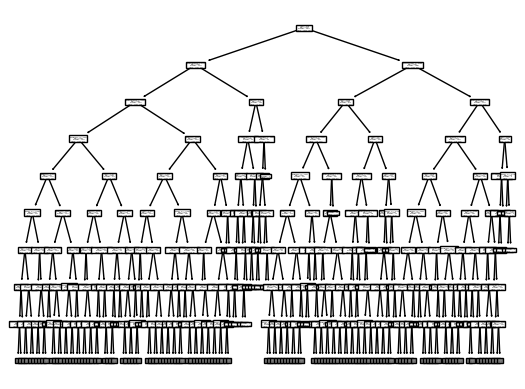

In [11]:
## YOUR CODE HERE
from sklearn.tree import plot_tree

feature_names = hw_ds.columns
feature_names = list(feature_names)
for item in ohe_features:
    feature_names.remove(item)
feature_names.remove(target)

temp_feat = len(feature_names)
for i in range(0, hw_ds_X.shape[1]-temp_feat):
    feature_names.append(oh_feat_names[i])

plot_tree(dt, max_depth=8, feature_names=feature_names)


**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [12]:
## YOUR CODE HERE
from sklearn.metrics import average_precision_score

# We wil use cost complexity pruning
path = dt.cost_complexity_pruning_path(X_train, y_train)
alphas = path["ccp_alphas"]

# We will pick the best tree based on the area under the PR curve (Average Precision - AP)
# This should perform better than just using accuracy, since the dataset is imbalanced
max_ap = None
best_tree = None
best_alpha = None
for i in alphas:
    temp_tree = DecisionTreeClassifier(criterion="gini", ccp_alpha=i, random_state=123)
    temp_tree.fit(X_train, y_train)

    yhat_val_prob = temp_tree.predict_proba(X_val)[:,1]
    temp_ap = average_precision_score(y_val, yhat_val_prob, pos_label=1)
    if max_ap is None or max_ap < temp_ap:
        max_ap = temp_ap
        best_alpha = i
        # best_tree = temp_tree
    
best_tree = DecisionTreeClassifier(criterion="gini", ccp_alpha=best_alpha, random_state=123)
best_tree.fit(X_dev, y_dev)

# Find metrics on final tree
best_tree_train_f1 = f1_score(y_train, best_tree.predict(X_train), pos_label=1)
best_tree_val_f1 = f1_score(y_val, best_tree.predict(X_val), pos_label=1)
best_tree_test_f1 = f1_score(y_test, best_tree.predict(X_test), pos_label=1)

best_tree_train_ap = average_precision_score(y_train, best_tree.predict_proba(X_train)[:,1], pos_label=1)
best_tree_test_ap = average_precision_score(y_test, best_tree.predict_proba(X_test)[:,1], pos_label=1)

print("--- AP Values for Best Tree: ")
print("Train Set: \t", best_tree_train_ap)
print("Val Set: \t", max_ap)
print("Test Set: \t", best_tree_test_ap)

print("--- F1 Score Metrics For Best Tree: ")
print("Train Set: \t", best_tree_train_f1)
print("Val Set: \t", best_tree_val_f1)
print("Test Set: \t", best_tree_test_f1)

""" 
The f1 test metrics are a small bit better than the previous version, but the training f1 has dropped.
This seems to indicate some kind of improvment to reduce overfitting on training data.
"""

--- AP Values for Best Tree: 
Train Set: 	 0.669492217494167
Val Set: 	 0.6432781139092831
Test Set: 	 0.6500310280014235
--- F1 Score Metrics For Best Tree: 
Train Set: 	 0.5921521997621879
Val Set: 	 0.5830388692579505
Test Set: 	 0.5551601423487545


' \nThe f1 test metrics are a small bit better than the previous version, but the training f1 has dropped.\nThis seems to indicate some kind of improvment to reduce overfitting on training data.\n'

**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

Value Importances (via tree attribute call): 
Age             : 0.4233715932766445
NumOfProducts   : 0.31677393477646804
IsActiveMember  : 0.11554721387977031
Balance         : 0.09156601733560234
Geography_3     : 0.05274124073151471
Gender_2        : 0.0
Gender_1        : 0.0
Geography_2     : 0.0
Geography_1     : 0.0
EstimatedSalary : 0.0
HasCrCard       : 0.0
Tenure          : 0.0
CreditScore     : 0.0


' \nOne way to define the "most important" features would be the rules that are evaluated closer to the root of the tree.\nSo the three most important would be at the root node and its two children.\nThe "most important" rules are placed at the root of the tree because they resulted in the \'max seperation\' in data.\nIn other words, the root rule/feature likely showed the most correlation to the output class.  \nAnd then the level 1 rules/feature likely showed the most correlation on the resulting data.\n\nTherefore, you could claim that the three most important features were "Age", "NumOfProducts", and "IsActiveMember"\n\nThat being said, there is a tree attribute that returns numerical feature importances with an equation, so you can call that, and rank them.\nIn some cases it gives a slightly different results than the above method.  But generally very similar.\nIn this case, the most important three features would be "Age", "NumOfProdcuts", and "IsActiveMember", for both methodolo

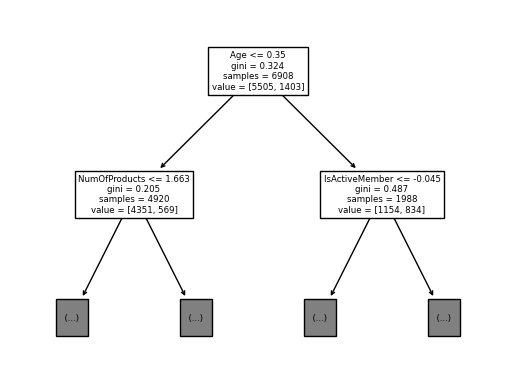

In [13]:
## YOUR CODE HERE
feat_imp = best_tree.feature_importances_
feat_imp_order = np.argsort(feat_imp)
print("Value Importances (via tree attribute call): ")
for i in range(len(feat_imp_order)-1, -1, -1):
    print(f"{feature_names[feat_imp_order[i]] : <15} : {feat_imp[feat_imp_order[i]]}")


# Print first three cells of tree 
plot_tree(best_tree, max_depth=1, feature_names=feature_names)

""" 
One way to define the "most important" features would be the rules that are evaluated closer to the root of the tree.
So the three most important would be at the root node and its two children.
The "most important" rules are placed at the root of the tree because they resulted in the 'max seperation' in data.
In other words, the root rule/feature likely showed the most correlation to the output class.  
And then the level 1 rules/feature likely showed the most correlation on the resulting data.

Therefore, you could claim that the three most important features were "Age", "NumOfProducts", and "IsActiveMember"

That being said, there is a tree attribute that returns numerical feature importances with an equation, so you can call that, and rank them.
In some cases it gives a slightly different results than the above method.  But generally very similar.
In this case, the most important three features would be "Age", "NumOfProdcuts", and "IsActiveMember", for both methodologies.
"""

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [45]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()
y_dev = y_dev.ravel()

rfc = RandomForestClassifier(random_state=123, oob_score=True)
rfc.fit(X_train, y_train)

# In order to compare to other model, need to get the f1 scores (or the AP)
forest_train_f1 = f1_score(y_train, rfc.predict(X_train), pos_label=1)
forest_val_f1 = f1_score(y_val, rfc.predict(X_val), pos_label=1)
forest_test_f1 = f1_score(y_test, rfc.predict(X_test), pos_label=1)

# TODO: Might remove Val set, and train on entire dev set, since you don't need val data

print("--- F1 Score Metrics for Default Random Forest")
print("Train Set: \t", forest_train_f1)
print("Val Set: \t", forest_val_f1)
print("Test Set: \t", forest_test_f1)
print("---")
print("Model OOB Error: ", rfc.oob_score_)

""" 
The test set f1 score is slightly better than that in 1.6, meaning the model will probably be better.
"""

--- F1 Score Metrics for Default Random Forest
Train Set: 	 1.0
Val Set: 	 0.5862068965517241
Test Set: 	 0.578397212543554
---
Model OOB Error:  0.8585215209419031


' \nThe test set f1 score is slightly better than that in 1.6, meaning the model will probably be better.\n'

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [46]:
## YOUR CODE HERE
""" 
Yes the forest model apears to have pure leaves (with the training input for a given tree), you can tell because the Train f1 score is perfect.
This can be verified by iterating through all the the trees and checking the purity of each leaf node.
"""

def is_leaf_return_imp(tree, curr_ind):
    if tree.children_left[curr_ind] == -1 or tree.children_left[curr_ind] == -1:
        return tree.impurity[curr_ind]
    else:
        return None

def search_down(tree, curr_ind):
    ret_list = []
    imp = is_leaf_return_imp(tree, curr_ind)
    if imp is None:
        if tree.children_left[curr_ind] != -1:
            items_left = search_down(tree, tree.children_left[curr_ind])
        else:
            items_left = []
        
        if tree.children_right[curr_ind] != -1:
            items_right = search_down(tree, tree.children_right[curr_ind])
        else:
            items_right = []

        return items_left + items_right
    else:
        return [imp]

""" 
Tree search that tests the impurity of each of the leaf nodes in each of the random forest estimators.
"""
flag = False
for tree_idx, est in enumerate(rfc.estimators_):
    tree = est.tree_
    # iterate through tree
    imps = search_down(tree, tree_idx)
    num_non_zero = np.count_nonzero(imps)
    if num_non_zero != 0:
        print("Estimator number ", tree_idx, " has ", num_non_zero, " impure nodes.")
        flag = True
if not flag:
    print("None of estimators had impure nodes.")


None of estimators had impure nodes.


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [1]:
## YOUR ANSWER HERE
""" 
We would want to tune based on the number of estimators and the max depth, 
since these are parameters are easy to rationalize about and have a large impact on the structure of the forest and the trees that make it up.
Both of them affect the complexity of the model, and max depth prevents always training to complete purity, in order to reduce overfitting.
"""

' \nWe would want to tune based on the number of estimators and the max depth, \nsince these are parameters are easy to rationalize about and have a large impact on the structure of the forest and the trees that make it up.\nBoth of them affect the complexity of the model, and max depth prevents always training to complete purity, in order to reduce overfitting.\n'

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [48]:
## YOUR ANSWER HERE
""" 
For our original forest was trained on 100 estimators, I would test some values that go above and below that value
For max depth, I would look at the depth that our original tree trained to, and use values around that one as well.

"""
temp_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]
print("Largest Tree Max Depth: ", max(temp_depths))
print("Smallest Tree Max Depth: ", min(temp_depths))

estimators = [50, 100, 150, 200, 250]
depths = [12, 16, 20, 24, 28]

Largest Tree Max Depth:  25
Smallest Tree Max Depth:  18


**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

Testing RFCs with Max Depth  12
Testing RFCs with Max Depth  16
Testing RFCs with Max Depth  20
Testing RFCs with Max Depth  24
Testing RFCs with Max Depth  28


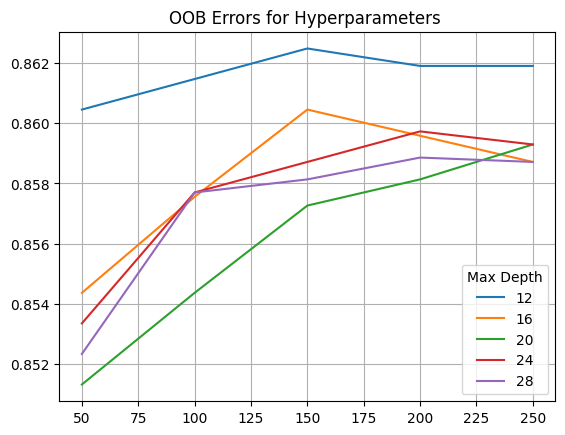

Best Model Hyperparameters: 
Num Estimators:  150
Max Depth Parameter:  12
Training OOB Error:  0.8624782860451651
--- F1 Score Metrics for Best Random Forest Hyperparms
Train Set: 	 0.8067039106145252
Val Set: 	 0.7775891341256367
Test Set: 	 0.5611510791366906


" \nThe  val f1 score increased (since it is training on both train and val now), but the test f1 didn't really improve from vanilla rfc.\n"

In [51]:
## YOUR CODE HERE
""" 
Note: Did hyperparameter training with OOB rather than cross-validation, since it allows training on the entire dev set.
"""
best_rfc = None
best_oob = None

best_depth = None
best_est = None

all_oob = []

for dep in depths:
    print("Testing RFCs with Max Depth ", dep)
    for est in estimators:
        # print("Training with ", est, " estimators, and max depth of: ", dep)
        temp_rfc = RandomForestClassifier(n_estimators=est, max_depth=dep, 
                                        oob_score=True, random_state=123)
        temp_rfc.fit(X_dev, y_dev)
        temp_oob = temp_rfc.oob_score_
        all_oob.append(temp_oob)
        if best_oob is None or temp_oob > best_oob:
            best_oob = temp_oob
            best_depth = dep
            best_est = est

# Train model on best hyperparameters
best_rfc = RandomForestClassifier(n_estimators=best_est, max_depth=best_depth, 
                                        oob_score=True, random_state=123)
best_rfc.fit(X_dev, y_dev)

# Make a plot of the oob
plt.figure()
for i in range(0, len(depths)):
    oob_scores = all_oob[i*len(estimators):(i*len(estimators))+len(estimators)]
    plt.plot(estimators, oob_scores, label=depths[i])
plt.legend(title="Max Depth")
plt.title("OOB Errors for Hyperparameters ")
plt.grid()
plt.show()

print("Best Model Hyperparameters: ")
print("Num Estimators: ", best_est)
print("Max Depth Parameter: ", best_depth)
print("Training OOB Error: ", best_oob)

forest_train_f1 = f1_score(y_train, best_rfc.predict(X_train), pos_label=1)
forest_val_f1 = f1_score(y_val, best_rfc.predict(X_val), pos_label=1)
forest_test_f1 = f1_score(y_test, best_rfc.predict(X_test), pos_label=1)

print("--- F1 Score Metrics for Best Random Forest Hyperparms")
print("Train Set: \t", forest_train_f1)
print("Val Set: \t", forest_val_f1)
print("Test Set: \t", forest_test_f1)

""" 
The  val f1 score increased (since it is training on both train and val now), but the test f1 didn't really improve from vanilla rfc.
"""


**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

In [52]:
## YOUR CODE HERE
""" 
Just like with a single decision tree, there is a parameter that lists the feature importances.
We can rank them to see which ones are concidered to be most important.
"""

feat_imp = best_rfc.feature_importances_
feat_imp_order = np.argsort(feat_imp)
print("Value Importances (via tree attribute call): ")
for i in range(len(feat_imp_order)-1, -1, -1):
    print(f"{feature_names[feat_imp_order[i]] : <15} : {feat_imp[feat_imp_order[i]]}")

""" 
They did end up being a little different from the single tree example in 1.9. 
For example, There are now "Estimated Salary" and "CreditScore" in the top 3, which were much lower before.
"""


Value Importances (via tree attribute call): 
Age             : 0.27247118827963435
NumOfProducts   : 0.17136150253066754
Balance         : 0.12831852398220742
EstimatedSalary : 0.11568341152777153
CreditScore     : 0.11406103424307884
Tenure          : 0.06501709933309854
IsActiveMember  : 0.04538653944390245
Geography_3     : 0.029366023481768762
HasCrCard       : 0.01536569657646666
Gender_1        : 0.011071440704313509
Geography_1     : 0.01101840850663072
Gender_2        : 0.01051310134958767
Geography_2     : 0.01036603004087184


' \nThey did end up being a little different from the single tree example in 1.9. \nFor example, There are now "Estimated Salary" and "CreditScore" in the top 3, which were much lower before.\n'

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [53]:
## YOUR CODE HERE
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
import time

# Parameters to tune on
# Random search would probably be better, but it feels like if we are only taking 4 examples from each that would be too volitile.
# With more sampling, I would tend towards using random search
estimators = [50, 100, 150, 200]
depths = [10, 16, 20, 24]
learn_rates = [0.01, 0.1, 1, 10]

# Still using f1 rather than accuracy, since dataset is impalanced
gbc_best_mean_f1 = None
gbc_best_depth = None
gbc_best_est = None
gbc_best_lr = None

hgbc_best_mean_f1 = None
hgbc_best_depth = None
hgbc_best_max_iter = None
hgbc_best_lr = None

kfold = KFold(n_splits=5)
f1_scorer = make_scorer(f1_score)

start_time = time.perf_counter()

for est in estimators:
    print("Training for Est: ", est)
    for dep in depths:
        for lr in learn_rates:
            temp_gbc = GradientBoostingClassifier(n_estimators=est, max_depth=dep, learning_rate=lr, warm_start=True)
            temp_hgbc = HistGradientBoostingClassifier(max_iter=est, max_depth=dep, learning_rate=lr, warm_start=True)

            # Use k fold cross val with f1 score to evaluate model
            results_gbc = cross_val_score(temp_gbc, X=X_dev, y=y_dev, cv=kfold, scoring=f1_scorer)
            results_hgbc = cross_val_score(temp_hgbc, X=X_dev, y=y_dev, cv=kfold, scoring=f1_scorer)

            # Pick best hyperparmeters based on average f1 from kfold
            temp_gbc_f1 = np.mean(results_gbc)
            temp_hgbc_f1 = np.mean(results_hgbc)

            if gbc_best_mean_f1 is None or temp_gbc_f1 > gbc_best_mean_f1:
                gbc_best_mean_f1 = temp_gbc_f1
                gbc_best_depth = dep
                gbc_best_est = est
                gbc_best_lr = lr

            if hgbc_best_mean_f1 is None or temp_hgbc_f1 > hgbc_best_mean_f1:
                hgbc_best_mean_f1 = temp_gbc_f1
                hgbc_best_depth = dep
                hgbc_best_max_iter = est
                hgbc_best_lr = lr


end_time = time.perf_counter()
print("---")
print("Time for Hyperparameter Tuning: ")
print("Seconds: ", end_time-start_time)
print("Minutes: ", (end_time-start_time)/60.0)
print("---")

# After finding the best hyperparameters, make models 
best_gbc = GradientBoostingClassifier(n_estimators=gbc_best_est, max_depth=gbc_best_depth, learning_rate=gbc_best_lr)
best_gbc.fit(X_dev, y_dev)
best_hgbc = HistGradientBoostingClassifier(max_iter=hgbc_best_max_iter, max_depth=hgbc_best_depth, learning_rate=hgbc_best_lr)
best_hgbc.fit(X_dev, y_dev)


print("--- GradientBoostring Best Hyperparameters: ")
print("Num Estimators: ", gbc_best_est)
print("Max Depth Param: ", gbc_best_depth)
print("Learning Rate: ", gbc_best_lr)
print("--- Best Model Test Metrics - GradientBoosting F1 Score: ",
        f1_score(y_test, best_gbc.predict(X_test), pos_label=1))

print("--- HistGradientBoostring Best Hyperparameters: ")
print("Max Iter Param: ", hgbc_best_max_iter)
print("Max Depth Param: ", gbc_best_depth)
print("Learning Rate: ", gbc_best_lr)
print("--- Best Model Test Metrics - HistGradientBoosting F1 Score: ",
        f1_score(y_test, best_hgbc.predict(X_test), pos_label=1))



Training for Est:  50
Training for Est:  100
Training for Est:  150
Training for Est:  200
---
Time for Hyperparameter Tuning: 
Seconds:  1684.4718542
Minutes:  28.074530903333333
---
--- GradientBoostring Best Hyperparameters: 
Num Estimators:  50
Max Depth Param:  10
Learning Rate:  0.1
--- Best Model Test Metrics - GradientBoosting F1 Score:  0.5564924114671164
--- HistGradientBoostring Best Hyperparameters: 
Max Iter Param:  200
Max Depth Param:  10
Learning Rate:  0.1
--- Best Model Test Metrics - HistGradientBoosting F1 Score:  0.544


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [55]:
## YOUR CODE HERE
from xgboost import XGBClassifier

# Will tune the same 3 hyperparameters
kfold = KFold(n_splits=10)
f1_scorer = make_scorer(f1_score)

best_mean_f1 = None
best_est = None
best_depth = None
best_lr = None

start_time = time.perf_counter()

for est in estimators:
    print("Training on Num Estimator: ", est)
    for dep in depths:
        for lr in learn_rates:
            temp_xgb = XGBClassifier(n_estimators=est, max_depth=dep, learning_rate=lr)

            # Use k fold cross val to evaluate best hyperparameters
            results = cross_val_score(temp_xgb, X=X_dev, y=y_dev, cv=kfold, scoring=f1_scorer)
            mean_f1 = np.mean(results)

            # Pick hyperparameters based on best average f1 from kfold
            if best_mean_f1 is None or mean_f1 > best_mean_f1:

                best_mean_f1 = mean_f1
                best_est = est
                best_dep = dep
                best_lr = lr

end_time = time.perf_counter()
print("Time for Hyperparameter turning: ")
print("Seconds: ", end_time-start_time)
print("Minutes: ", (end_time-start_time)/60)

# After finding the best hyperparameters, make model
best_xgb = XGBClassifier(n_estimators=best_est, max_depth=best_depth, learning_rate=best_lr)
best_xgb.fit(X_dev, y_dev)

print("XGBoostClassifer Best Hyperparameters: ")
print("Num Estimators: ", best_est)
print("Max Depth Param: ", best_depth)
print("Learning Rate: ", best_lr)
print("Best Model Test Metrics - GradientBoosting F1 Score: ",
        f1_score(y_test, best_xgb.predict(X_test), pos_label=1))

Training on Num Estimator:  50
Training on Num Estimator:  100
Training on Num Estimator:  150
Training on Num Estimator:  200
Time for Hyperparameter turning: 
Seconds:  1140.5629487000006
Minutes:  19.009382478333343
XGBoostClassifer Best Hyperparameters: 
Num Estimators:  200
Max Depth Param:  None
Learning Rate:  0.01
Best Model Test Metrics - GradientBoosting F1 Score:  0.5698924731182795


**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

In [57]:
## YOUR ANSWER HERE

""" 
The XGBoost model performed slightly better than the HistGradientBoosting and GradientBoosting classifiers (in terms of f1).
They all performed slightly better than 1.6 and very similar to 2.1
Note: This was using f1 score rather than accuracy, due to the imbalance in the dataset.

"""

' \nThe XGBoost model performed slightly better than the HistGradientBoosting and GradientBoosting classifiers (in terms of f1).\nThey all performed slightly better than 1.6 and very similar to 2.1\nNote: This was using f1 score rather than accuracy, due to the imbalance in the dataset.\n\n'

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

In [58]:
## YOUR CODE HERE
feat_imp = best_xgb.feature_importances_
feat_imp_order = np.argsort(feat_imp)
print("Value Importances (via tree attribute call): ")
for i in range(len(feat_imp_order)-1, -1, -1):
    print(f"{feature_names[feat_imp_order[i]] : <15} : {feat_imp[feat_imp_order[i]]}")


print("Top three features: ")
print(feature_names[feat_imp_order[len(feat_imp_order)-1]], ",", feature_names[feat_imp_order[len(feat_imp_order)-2]], ",", feature_names[feat_imp_order[len(feat_imp_order)-3]])

""" 
These are the same top three features (but in a different order) from 1.9
"""

Value Importances (via tree attribute call): 
NumOfProducts   : 0.27814725041389465
IsActiveMember  : 0.21082699298858643
Age             : 0.19796761870384216
Geography_3     : 0.09362757205963135
Balance         : 0.05502517893910408
Geography_2     : 0.04358045384287834
Gender_1        : 0.03329707309603691
EstimatedSalary : 0.021981947124004364
Geography_1     : 0.021667737513780594
Tenure          : 0.018925132229924202
CreditScore     : 0.01868288777768612
HasCrCard       : 0.00627004774287343
Gender_2        : 0.0
Top three features: 
NumOfProducts , IsActiveMember , Age


' \nThese are the same top three features (but in a different order) from 1.9\n'

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [59]:
## YOUR CODE HERE
top_feat_inds = feat_imp_order[len(feat_imp_order)-7: len(feat_imp_order)]
top_feat_names = np.array(feature_names)[top_feat_inds]
print("Top Feature Names: ", top_feat_names)

# Make modified feature train, val, dev, and test sets
X_train_top = X_train[:, top_feat_inds]
X_val_top = X_val[:, top_feat_inds]
X_test_top = X_test[:, top_feat_inds]
X_dev_top = X_dev[:, top_feat_inds]

print("X_train Shape: ", X_train_top.shape)

# -- Repeat training process from 3.2 -- 
kfold = KFold(n_splits=10)
f1_scorer = make_scorer(f1_score)

best_mean_f1_top = None
best_est_top = None
best_depth_top = None
best_lr_top = None

start_time = time.perf_counter()

for est in estimators:
    print("Training on Num Estimator: ", est)
    for dep in depths:
        for lr in learn_rates:
            temp_xgb = XGBClassifier(n_estimators=est, max_depth=dep, learning_rate=lr)

            results = cross_val_score(temp_xgb, X=X_dev_top, y=y_dev, cv=kfold, scoring=f1_scorer)
            mean_f1 = np.mean(results)

            if best_mean_f1_top is None or mean_f1 > best_mean_f1_top:
                best_mean_f1_top = mean_f1
                best_est_top = est
                best_dep_top = dep
                best_lr_top = lr

end_time = time.perf_counter()
print("Time for Hyperparameter turning: ")
print("Seconds: ", end_time-start_time)
print("Minutes: ", (end_time-start_time)/60)

# After finding the best hyperparameters, make model
best_xgb_top = XGBClassifier(n_estimators=best_est_top, max_depth=best_depth_top, learning_rate=best_lr_top)
best_xgb_top.fit(X_dev_top, y_dev)

print("XGBoostClassifer Best Hyperparameters: ")
print("Num Estimators: ", best_est)
print("Max Depth Param: ", best_depth)
print("Learning Rate: ", best_lr)
print("Best Model Test Metrics - GradientBoosting F1 Score: ",
        f1_score(y_test, best_xgb.predict(X_test), pos_label=1))


Top Feature Names:  ['Gender_1' 'Geography_2' 'Balance' 'Geography_3' 'Age' 'IsActiveMember'
 'NumOfProducts']
X_train Shape:  (5181, 7)
Training on Num Estimator:  50
Training on Num Estimator:  100
Training on Num Estimator:  150
Training on Num Estimator:  200
Time for Hyperparameter turning: 
Seconds:  696.4742303999956
Minutes:  11.607903839999926
XGBoostClassifer Best Hyperparameters: 
Num Estimators:  200
Max Depth Param:  None
Learning Rate:  0.01
Best Model Test Metrics - GradientBoosting F1 Score:  0.5698924731182795


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [60]:
## YOUR CODE HERE
from sklearn.metrics import brier_score_loss
b_score = brier_score_loss(y_test, best_xgb.predict_proba(X_test)[:,1], pos_label=1)
print("Brier Score: ", b_score)

Brier Score:  0.10723644749953276


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

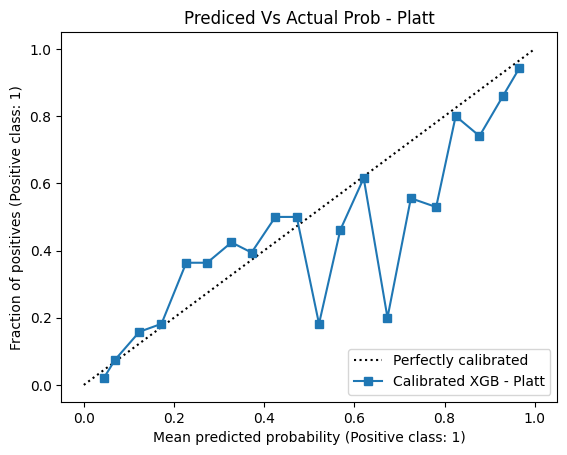

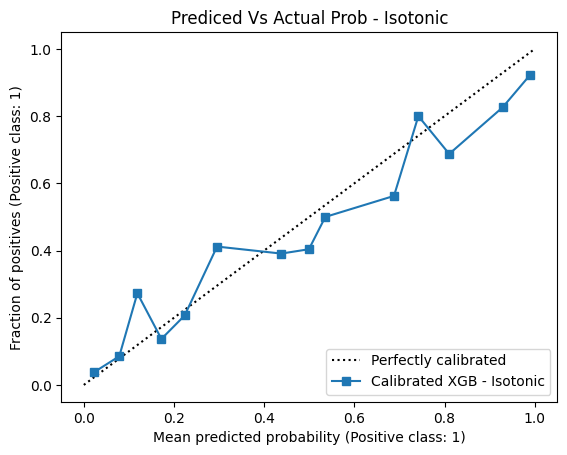

In [61]:
## YOUR CODE HERE
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
cal_xgb_platt = CalibratedClassifierCV(best_xgb, cv="prefit", method="sigmoid")
cal_xgb_iso = CalibratedClassifierCV(best_xgb, cv="prefit", method="isotonic")

# Feel like I should be fitting this on some kind of calibration split, rather than the validation data
# But not sure which set I would take this validation set out of, since the example in slides just replaced validation set with calibration split
# But I need validation split for training process and hyperparameter tuning

cal_xgb_platt.fit(X_val, y_val)
cal_xgb_iso.fit(X_val, y_val)

fig = plt.figure()
ax = plt.gca()
display = CalibrationDisplay.from_estimator(cal_xgb_platt, X_test, y_test, n_bins=20, pos_label=1, 
                                            ax=ax, name="Calibrated XGB - Platt")
ax.set_title("Prediced Vs Actual Prob - Platt")
plt.show()

fig = plt.figure()
ax = plt.gca()
display = CalibrationDisplay.from_estimator(cal_xgb_iso, X_test, y_test, n_bins=20, pos_label=1, 
                                            ax=ax, name="Calibrated XGB - Isotonic")
ax.set_title("Prediced Vs Actual Prob - Isotonic")
plt.show()

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [63]:
## YOUR CODE HERE
b_score_platt = brier_score_loss(y_test, cal_xgb_platt.predict_proba(X_test)[:,1], pos_label=1)
b_score_iso = brier_score_loss(y_test, cal_xgb_iso.predict_proba(X_test)[:,1], pos_label=1)
print("Brier Score - Platt: \t\t", b_score_platt)
print("Brier Score - Isotonic: \t", b_score_iso)

""" 
The Brier score stayed very close to what they were before calibration, meaning that the predicted probabilities are not much better.
"""

Brier Score - Platt: 		 0.10618551950335507
Brier Score - Isotonic: 	 0.10433225108764053


' \nThe Brier score stayed very close to what they were before calibration, meaning that the predicted probabilities are not much better.\n'